<a href="https://colab.research.google.com/github/SoroushSoleymani/engg680_2024_fall/blob/main/ENG680_Project/Comparative_Analysis_of_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comparative Analysis of Machine Learning Models for Predicting Blood Glucose Levels in Diabetic Patients

Group Number	7

We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications.
Name	Surname	Contribution	Signature

Soroush	Soleymani (Team Leader)	16.6%	S.S     23.11.2024

Armin	Aliyari	16.6%	A.A    23.11.2024

Fabiha	Islam	16.6%	F.I       23.11.2024

Aparna	Das	16.6%	A.D     23.11.2024

Samra	Pierre	16.6%	S.P      23.11.2024

Kaushini	Chandrachoodamani	16.6%	K.C     23.11.2024




### **Data** **Preparation**

In [20]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
# Step 2: Load the Dataset
file_path = '/content/Cleaned_Dataset_for_ML.csv'  # Update this with the actual file path in Colab
data = pd.read_csv(file_path)
# Step 3: Separate Features and Target
target_column = 'Historic Glucose (mmol/L)'
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

<ipython-input-21-86b12be789aa>:3: DtypeWarning: Columns (7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [22]:
# Step 4: Handle Non-Numeric Columns
# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print(f"Non-Numeric Columns: {non_numeric_columns.tolist()}")

Non-Numeric Columns: ['Meal Descriptions', 'Food type', 'DateTime']


In [23]:
# Encode non-numeric columns (One-Hot Encoding)
X = pd.get_dummies(X, columns=non_numeric_columns, drop_first=True)
# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Step 6: Scale Only Numerical Features
scaler = StandardScaler()

In [24]:
# Identify numerical columns for scaling
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [25]:
# Step 7: Output Shapes and Completion Message
print("\nData Preparation Completed!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



Data Preparation Completed!
X_train shape: (110282, 1090)
X_test shape: (47265, 1090)
y_train shape: (110282,)
y_test shape: (47265,)


**Exploratory Data Analysis (EDA)**


Step 1: Correlation Heatmap


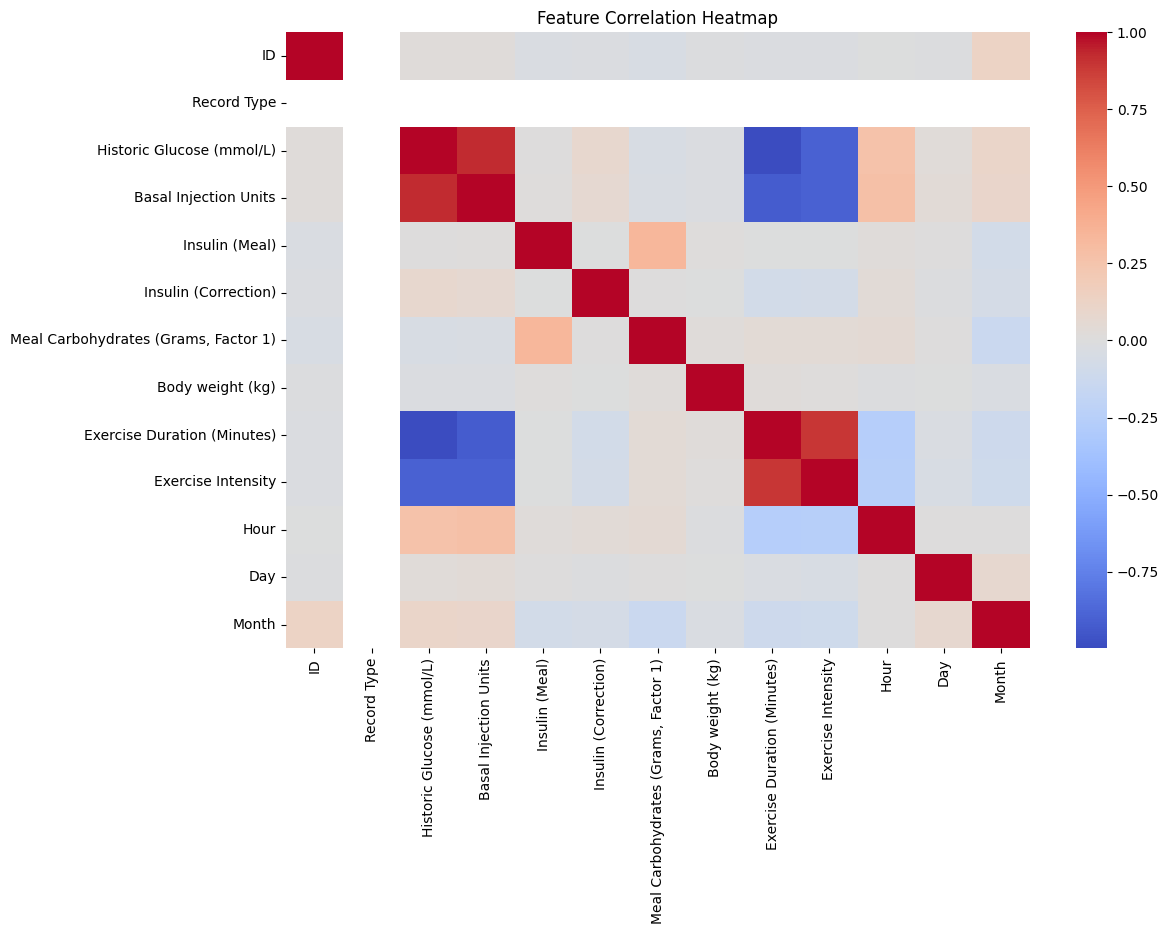

Top Features Correlated with Target:
Historic Glucose (mmol/L)               1.000000
Basal Injection Units                   0.925130
Hour                                    0.262250
Month                                   0.109861
Insulin (Correction)                    0.080582
Day                                     0.028230
ID                                      0.020594
Insulin (Meal)                          0.007227
Body weight (kg)                       -0.017928
Meal Carbohydrates (Grams, Factor 1)   -0.041516
Name: Historic Glucose (mmol/L), dtype: float64

Step 2: Distribution of Target Variable


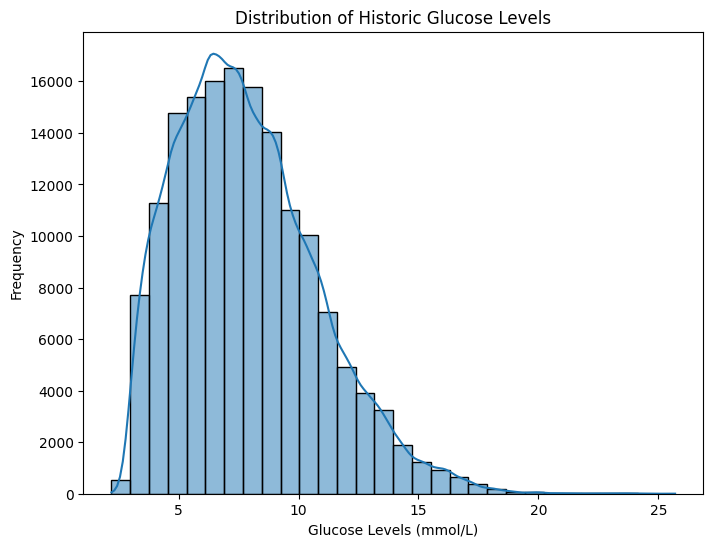


Step 3a: Basal Injection Units vs. Glucose Levels


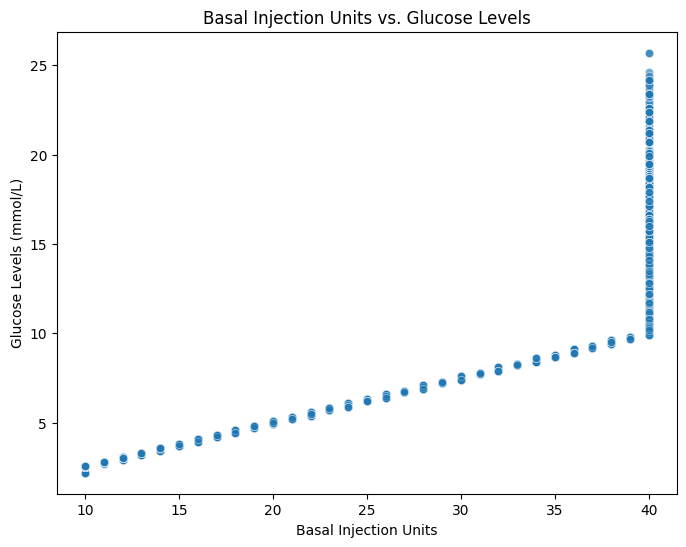


Step 3b: Exercise Duration vs. Glucose Levels


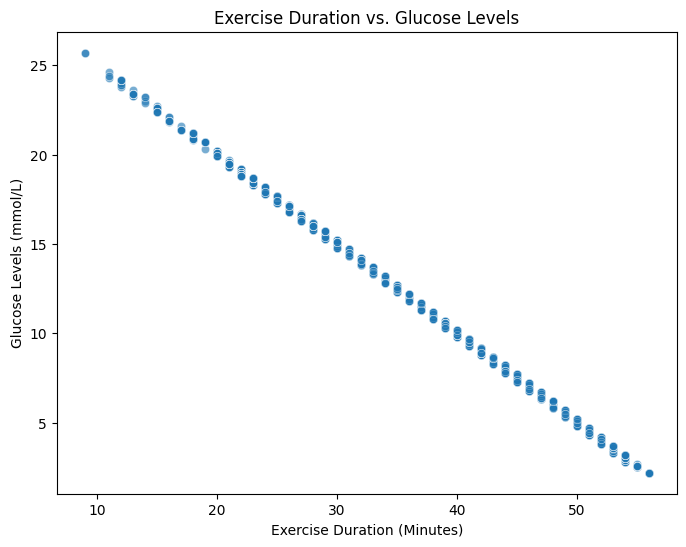


Step 3c: Exercise Intensity vs. Glucose Levels


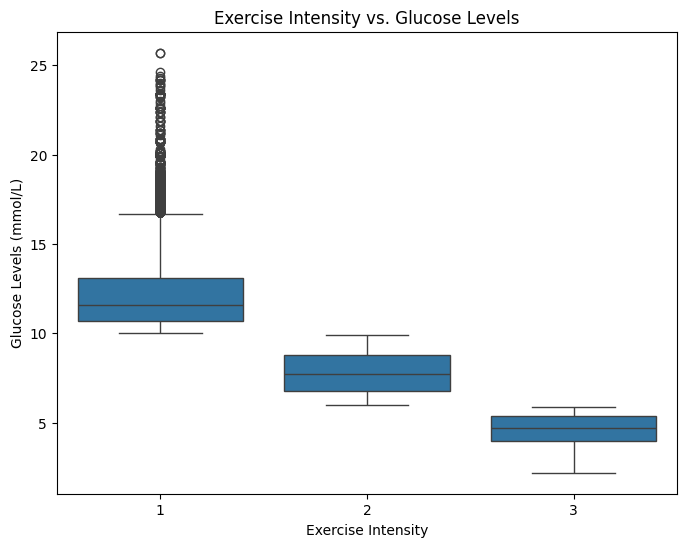


Step 4: Summary Statistics
                 ID  Record Type  Historic Glucose (mmol/L)  \
count  1.575470e+05     157547.0              157547.000000   
mean   1.614305e+19          0.0                   7.856506   
std    4.970170e+08          0.0                   2.951141   
min    1.614305e+19          0.0                   2.200000   
25%    1.614305e+19          0.0                   5.600000   
50%    1.614305e+19          0.0                   7.500000   
75%    1.614305e+19          0.0                   9.700000   
max    1.614305e+19          0.0                  25.700000   

       Basal Injection Units  Insulin (Meal)  Insulin (Correction)  \
count          157547.000000   157547.000000         157547.000000   
mean               29.517795        0.037018              0.010854   
std                 8.603851        0.532804              0.175735   
min                10.000000        0.000000              0.000000   
25%                22.000000        0.000000          

In [26]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Correlation Heatmap
print("\nStep 1: Correlation Heatmap")
# Filter numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64', 'uint64'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Display the top correlated features with the target
correlated_features = numeric_data.corr()['Historic Glucose (mmol/L)'].sort_values(ascending=False)
print("Top Features Correlated with Target:")
print(correlated_features.head(10))

# Step 2: Distribution of Target Variable
print("\nStep 2: Distribution of Target Variable")
plt.figure(figsize=(8, 6))
sns.histplot(data['Historic Glucose (mmol/L)'], kde=True, bins=30)
plt.title("Distribution of Historic Glucose Levels")
plt.xlabel("Glucose Levels (mmol/L)")
plt.ylabel("Frequency")
plt.show()

# Step 3: Relationships Between Key Features and Target

# Basal Injection Units vs. Glucose Levels
print("\nStep 3a: Basal Injection Units vs. Glucose Levels")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Basal Injection Units'], y=data['Historic Glucose (mmol/L)'], alpha=0.6)
plt.title("Basal Injection Units vs. Glucose Levels")
plt.xlabel("Basal Injection Units")
plt.ylabel("Glucose Levels (mmol/L)")
plt.show()

# Exercise Duration vs. Glucose Levels
print("\nStep 3b: Exercise Duration vs. Glucose Levels")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Exercise Duration (Minutes)'], y=data['Historic Glucose (mmol/L)'], alpha=0.6)
plt.title("Exercise Duration vs. Glucose Levels")
plt.xlabel("Exercise Duration (Minutes)")
plt.ylabel("Glucose Levels (mmol/L)")
plt.show()

# Exercise Intensity vs. Glucose Levels
print("\nStep 3c: Exercise Intensity vs. Glucose Levels")
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Exercise Intensity'], y=data['Historic Glucose (mmol/L)'])
plt.title("Exercise Intensity vs. Glucose Levels")
plt.xlabel("Exercise Intensity")
plt.ylabel("Glucose Levels (mmol/L)")
plt.show()

# Step 4: Summary Statistics
print("\nStep 4: Summary Statistics")
summary_statistics = data.describe()
print(summary_statistics)

**Feature Engineering**

In [27]:
import numpy as np

# Step 1: Create Interaction Features
data['Exercise_Duration_Intensity'] = data['Exercise Duration (Minutes)'] * data['Exercise Intensity']

# Step 2: Encode Time Features as Cyclical Features
# Hour: Encode as sine and cosine
data['Hour_sin'] = np.sin(2 * np.pi * data['Hour'] / 24)
data['Hour_cos'] = np.cos(2 * np.pi * data['Hour'] / 24)

# Month: Encode as sine and cosine
data['Month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)
data['Month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)

# Step 3: Drop Redundant or Low-Utility Features
columns_to_drop = ['Hour', 'Month', 'Body weight (kg)', 'Meal Descriptions', 'Food type', 'DateTime', 'ID']
data = data.drop(columns=columns_to_drop, errors='ignore')

# Step 4: Normalize/Scale Features
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Step 5: Final Dataset Inspection
print("\nFinal Feature-Engineered Dataset Info:")
print(data.info())
print("\nPreview of Feature-Engineered Dataset:")
print(data.head())


Final Feature-Engineered Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157547 entries, 0 to 157546
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Record Type                           157547 non-null  float64
 1   Historic Glucose (mmol/L)             157547 non-null  float64
 2   Basal Injection Units                 157547 non-null  float64
 3   Insulin (Meal)                        157547 non-null  float64
 4   Insulin (Correction)                  157547 non-null  float64
 5   Meal Carbohydrates (Grams, Factor 1)  157547 non-null  float64
 6   Exercise Duration (Minutes)           157547 non-null  float64
 7   Exercise Intensity                    157547 non-null  float64
 8   Day                                   157547 non-null  float64
 9   Exercise_Duration_Intensity           157547 non-null  float64
 10  Hour_sin                    

Linear Regression

Linear Regression Model Evaluation:
Training MAE: 0.0432, Testing MAE: 0.0432
Training MSE: 0.0023, Testing MSE: 0.0023
Training R^2: 0.9977, Testing R^2: 0.9976

Feature Importance (Linear Regression Coefficients):
                                 Feature  Coefficient
8            Exercise_Duration_Intensity     0.188899
1                  Basal Injection Units     0.050362
3                   Insulin (Correction)     0.000412
2                         Insulin (Meal)     0.000193
12                             Month_cos     0.000076
10                              Hour_cos     0.000066
7                                    Day     0.000054
0                            Record Type     0.000000
4   Meal Carbohydrates (Grams, Factor 1)    -0.000122
11                             Month_sin    -0.000269
9                               Hour_sin    -0.001071
6                     Exercise Intensity    -0.153709
5            Exercise Duration (Minutes)    -0.989138


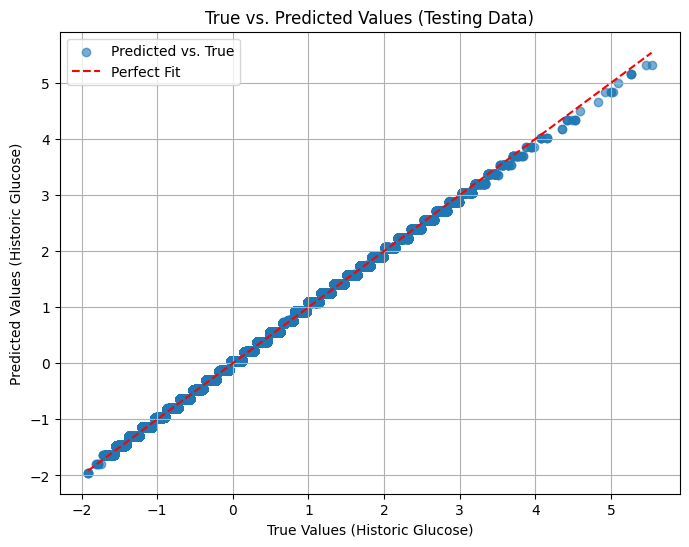

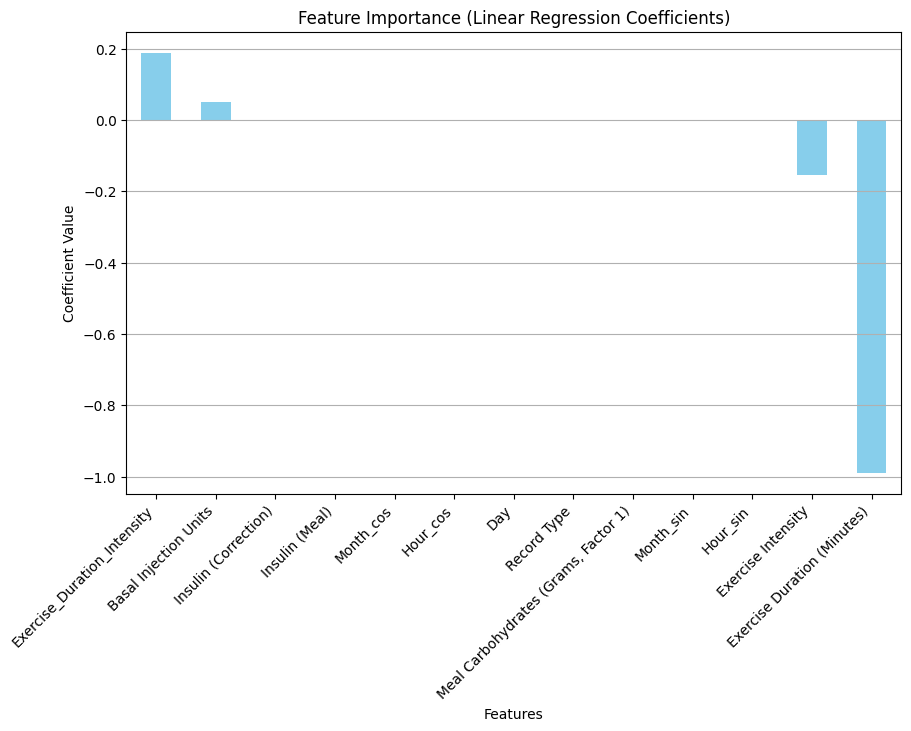

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load and Prepare the Dataset
# Assuming the feature-engineered dataset is already loaded into the variable `data`

# Define target and features
target_column = 'Historic Glucose (mmol/L)'
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target variable

# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize and Train the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 4: Make Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Step 5: Evaluate the Model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print Evaluation Metrics
print("Linear Regression Model Evaluation:")
print(f"Training MAE: {mae_train:.4f}, Testing MAE: {mae_test:.4f}")
print(f"Training MSE: {mse_train:.4f}, Testing MSE: {mse_test:.4f}")
print(f"Training R^2: {r2_train:.4f}, Testing R^2: {r2_test:.4f}")

# Step 6: Analyze Feature Importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Linear Regression Coefficients):")
print(coefficients)

# Step 7: Visualizations

# True vs. Predicted Values (Testing Data)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, label="Predicted vs. True")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.title("True vs. Predicted Values (Testing Data)")
plt.xlabel("True Values (Historic Glucose)")
plt.ylabel("Predicted Values (Historic Glucose)")
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance (Coefficients)
coefficients.plot(kind='bar', x='Feature', y='Coefficient', figsize=(10, 6), legend=False, color="skyblue")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.show()